In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def load_and_process_csv(file_path):
    """
    Reads a CSV file using csv module, processes it row by row, 
    and then converts it into a pandas DataFrame.
    
    Args:
        file_path (str): Path to the input CSV file.

    Returns:
        pd.DataFrame: Processed pandas DataFrame containing the CSV data.
    """
    # Initialize an empty list to store rows
    rows = []
    columns = []

    # Read the CSV file using csv module
    with open(file_path, 'r', newline='', encoding='utf-8') as infile:
        csv_reader = csv.reader(infile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        for idx, row in enumerate(csv_reader):
            if idx == 0:  # First row contains column headers
                columns = row
            else:
                rows.append(row)
    
    # Convert the data into a pandas DataFrame
    df = pd.DataFrame(rows, columns=columns)
    
    # Ensure proper data types for numeric fields
    numeric_columns = [
        'inner_id', 'confidence_1', 'confidence_2', 'confidence_3',
        'manipulative_1', 'manipulative_2', 'manipulative_3',
        'victim_1', 'victim_2', 'victim_3'
    ]
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df



In [3]:
# Example usage
file_path = "mentalmanip_detailed.csv"
df = load_and_process_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   inner_id        id                                           dialogue  \
0         0  85517654  Person1: I can almost feel your doubt about wh...   
1         1  85517489  Person1: She's a charming girl, isn't she, Mit...   
2         2  85515383  Person1: Well... yes, quite possibly.\nPerson2...   
3         3  85516931  Person1: Ahh, sunshine.\nPerson2: You're going...   
4         4  85517588  Person1: Where 're you going?\nPerson2: I'm no...   

                             original movie dialogue          movie name  \
0  MRS. REDI(?):I can almost feel your doubt abou...  the seventh victim   
1  LYDIA(f):She's a charming girl, isn't she, Mit...           the birds   
2  JETSON(M):Well... yes, quite possibly. \nSYKES...        alien nation   
3  JAM(m):Ahh, sunshine. \nMRS. BRUCE(?):You're g...   detroit rock city   
4  TAMMY(?):Where 're you going? \nLISA(?):I'm no...            election   

           agreement annotator_1  manipulative_1  \
0              100.0        AN16  

Technique Frequency Distribution:
Persuasion or Seduction    905
Shaming or Belittlement    624
Accusation                 579
Intimidation               446
Rationalization            406
Brandishing Anger          268
Evasion                    212
Playing Victim Role        212
Denial                     191
Feigning Innocence         164
Playing Servant Role       107
cannot decide               67
dtype: int64


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

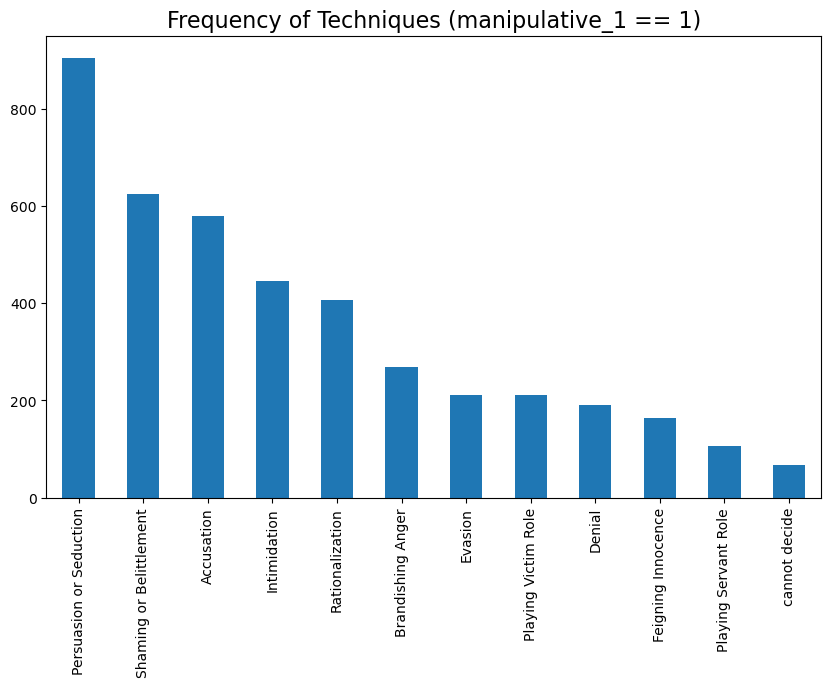

In [4]:
# Filter DataFrame where manipulative_1 == 1
filtered_df = df[df['manipulative_1'] == 1]

# Drop rows with missing technique_1 data
filtered_df = filtered_df.dropna(subset=['technique_1'])

# Split the technique_1 column into individual techniques
technique_series = filtered_df['technique_1'].str.split(',')

# Flatten the list of techniques and create a new Series
flattened_techniques = pd.Series([technique.strip() for sublist in technique_series for technique in sublist])

# Count the frequency of each technique
technique_counts = flattened_techniques.value_counts()

# Display the frequency table
print("Technique Frequency Distribution:")
print(technique_counts)

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
technique_counts.plot(kind='bar')
plt.title('Frequency of Techniques (manipulative_1 == 1)', fontsize=16)
plt.xlabel


In [10]:
# Combine filters for cases where all annotators agree the dialogue is manipulative
manipulative_filter_agree = (df['manipulative_1'] == 1) & (df['manipulative_2'] == 1) & (df['manipulative_3'] == 1)
# Combine filters for manipulative annotations across all annotators
manipulative_filter = (df['manipulative_1'] == 1) | (df['manipulative_2'] == 1) | (df['manipulative_3'] == 1)

# Apply the filter
filtered_df = df[manipulative_filter]

# Apply the filter
filtered_df_agree = df[manipulative_filter_agree]


Technique Frequency Distribution:
Persuasion or Seduction    1975
Shaming or Belittlement    1459
Accusation                 1391
Intimidation               1044
Rationalization            1017
Brandishing Anger           654
Evasion                     476
Playing Victim Role         472
Denial                      438
Feigning Innocence          369
Playing Servant Role        242
cannot decide               135
dtype: int64


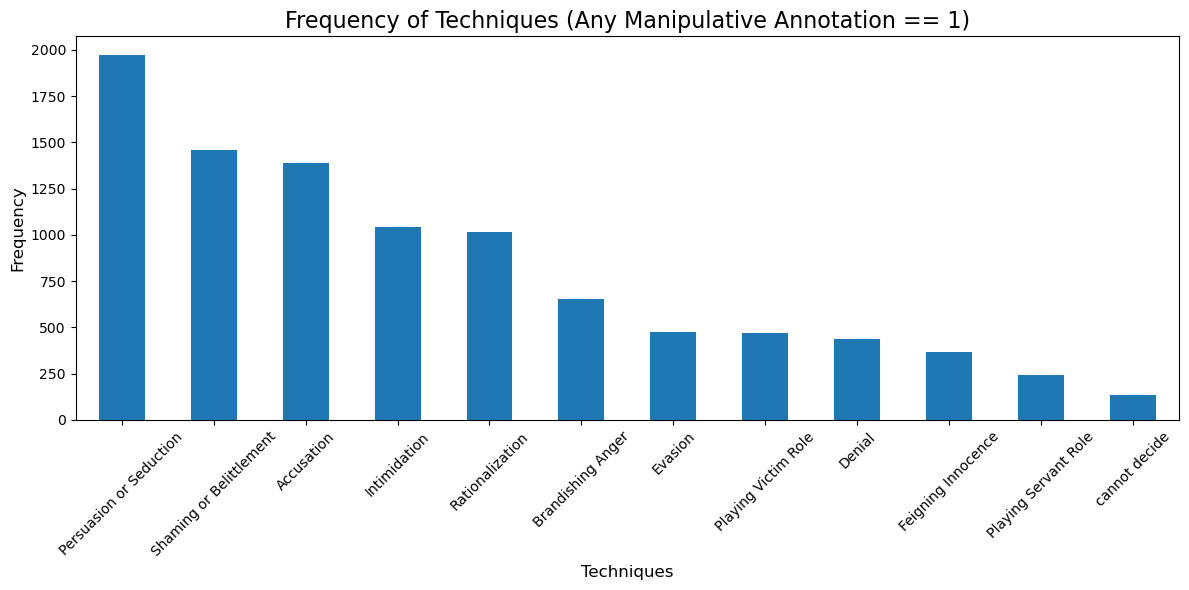

In [11]:


# ## 5. Extract Techniques from All Annotators
# Columns containing techniques
technique_columns = ['technique_1', 'technique_2', 'technique_3']

# Initialize an empty list to store all techniques
all_techniques = []

# Iterate over technique columns and collect techniques
for col in technique_columns:
    if col in filtered_df_agree.columns:
        technique_series = filtered_df_agree[col].dropna().str.split(',')
        flattened_techniques = [technique.strip() for sublist in technique_series for technique in sublist]
        all_techniques.extend(flattened_techniques)

# ## 6. Calculate Technique Frequencies
# Count the frequency of each technique
technique_counts = pd.Series(all_techniques).value_counts()

# Display the frequency table
print("Technique Frequency Distribution:")
print(technique_counts)

# ## 7. Visualize Technique Frequency Distribution
# Create a bar chart for the frequency distribution
plt.figure(figsize=(12, 6))
technique_counts.plot(kind='bar')
plt.title('Frequency of Techniques (Any Manipulative Annotation == 1)', fontsize=16)
plt.xlabel('Techniques', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

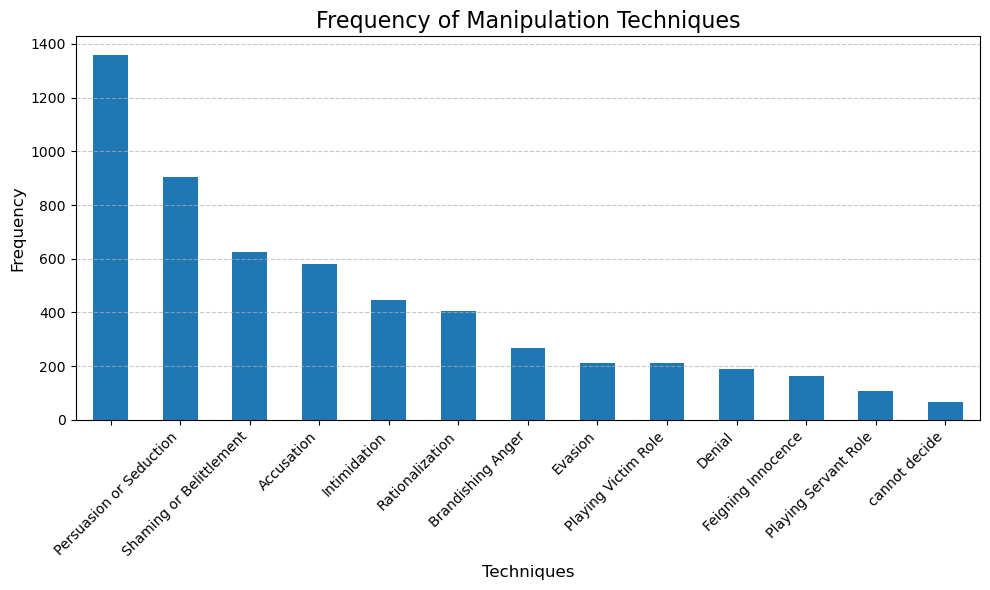

Proportions of Manipulative Dialogues:
High Agreement: Series([], Name: manipulative_1, dtype: float64)
Low Agreement: 1    0.66
0    0.34
Name: manipulative_1, dtype: float64
Average Confidence Scores:
{'Manipulative': 3.8359848484848484, 'Non-Manipulative': 3.7982843137254902}


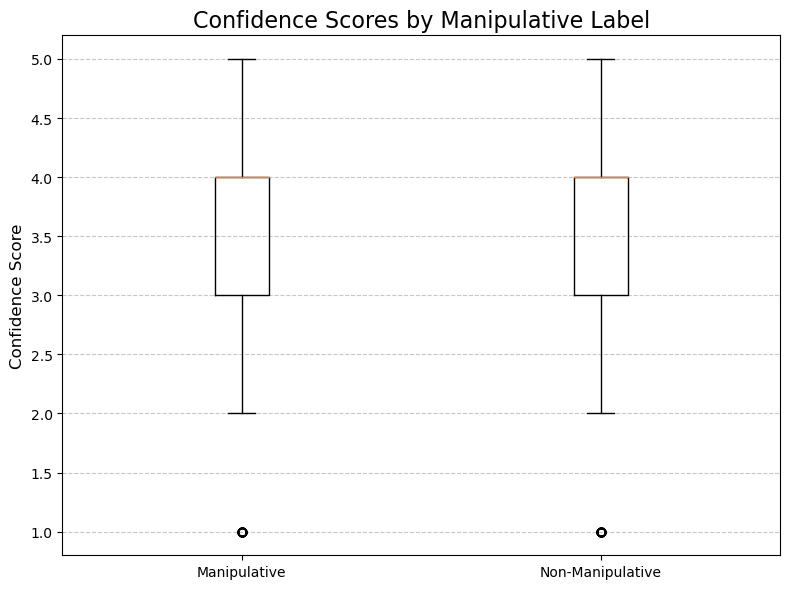

In [8]:
# 1. Most Common Manipulation Techniques
def analyze_techniques(df):
    filtered_df = df.dropna(subset=['technique_1'])
    technique_series = filtered_df['technique_1'].str.split(',')

    # Flatten the list of techniques while handling invalid data
    flattened_techniques = pd.Series(
        [tech.strip() for sublist in technique_series if isinstance(sublist, list) for tech in sublist]
    )
    
    technique_counts = flattened_techniques.value_counts()

    # Plot
    plt.figure(figsize=(10, 6))
    technique_counts.plot(kind='bar')
    plt.title('Frequency of Manipulation Techniques', fontsize=16)
    plt.xlabel('Techniques', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return technique_counts


# 2. Agreement Among Annotators
def analyze_agreement(df):
    high_agreement = df[df['agreement'] == 'High']
    low_agreement = df[df['agreement'] != 'High']
    
    high_agreement_count = high_agreement['manipulative_1'].value_counts(normalize=True)
    low_agreement_count = low_agreement['manipulative_1'].value_counts(normalize=True)
    
    print("Proportions of Manipulative Dialogues:")
    print("High Agreement:", high_agreement_count)
    print("Low Agreement:", low_agreement_count)

# 3. Confidence Score Patterns
def analyze_confidence(df):
    manipulative_df = df[df['manipulative_1'] == 1]
    non_manipulative_df = df[df['manipulative_1'] == 0]
    
    confidence_scores = {
        'Manipulative': manipulative_df[['confidence_1', 'confidence_2', 'confidence_3']].mean().mean(),
        'Non-Manipulative': non_manipulative_df[['confidence_1', 'confidence_2', 'confidence_3']].mean().mean()
    }
    
    print("Average Confidence Scores:")
    print(confidence_scores)
    
    # Boxplot
    plt.figure(figsize=(8, 6))
    data = [
        manipulative_df[['confidence_1', 'confidence_2', 'confidence_3']].values.flatten(),
        non_manipulative_df[['confidence_1', 'confidence_2', 'confidence_3']].values.flatten()
    ]
    plt.boxplot(data, labels=['Manipulative', 'Non-Manipulative'])
    plt.title('Confidence Scores by Manipulative Label', fontsize=16)
    plt.ylabel('Confidence Score', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Analyze Techniques
technique_counts = analyze_techniques(df)

# Analyze Agreement
analyze_agreement(df)

# Analyze Confidence
analyze_confidence(df)
